## How to look at MITgcm netCDF output, an example

You need to install MITgcmutils package (https://pypi.org/project/MITgcmutils/)

In [35]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
import numpy as np
import xarray as xr
import MITgcmutils as MIT
import seaborn as sns

In [36]:
sns.set_context('notebook')
#outdir = '/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run_expand/mnc_0001/'
#outdir2 = '/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run_expand/mnc_0002/'
outdir_nobay ='/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run_expand_nobay/mnc_0002/'

In [37]:
#nc = MIT.mnc_files(outdir2+'state.0000000600.t*.nc')
#gr = MIT.mnc_files(outdir2+'grid.t*.nc')
#nc2 = MIT.mnc_files(outdir2+'state.0000000600.t*.nc')
#gr2 = MIT.mnc_files(outdir2+'grid.t*.nc')
nc_nobay = MIT.mnc_files(outdir_nobay+'state.0000000600.t*.nc')
gr_nobay = MIT.mnc_files(outdir_nobay+'grid.t*.nc')

In [25]:
# Load some grid variables
depth = gr_nobay.variables['Depth'][:]
hFacC = gr_nobay.variables['HFacC'][:]
XC = gr_nobay.variables['XC'][:]
YC = gr_nobay.variables['YC'][:]
XG = gr_nobay.variables['XG'][:]
YG = gr_nobay.variables['YG'][:]
RC = gr_nobay.variables['RC'][:]
RL = gr_nobay.variables['RL'][:]
mask = np.ma.getmask(np.ma.masked_values(depth, 0))
mask3D = np.ma.getmask(np.ma.masked_values(hFacC[:,:], 0))
time = nc_nobay.variables['T'][:102]
timetotal = nc_nobay.variables['T'][:]

In [26]:
nc_nobay.variables

{'T': <MITgcmutils.mnc.MNCVariable at 0x41d4afe00>,
 'iter': <MITgcmutils.mnc.MNCVariable at 0x41cf77650>,
 'Xp1': <MITgcmutils.mnc.MNCVariable at 0x41cf75f40>,
 'Y': <MITgcmutils.mnc.MNCVariable at 0x41c690830>,
 'Z': <MITgcmutils.mnc.MNCVariable at 0x41ff9a840>,
 'U': <MITgcmutils.mnc.MNCVariable at 0x41ff98230>,
 'X': <MITgcmutils.mnc.MNCVariable at 0x41ff98590>,
 'Yp1': <MITgcmutils.mnc.MNCVariable at 0x41ff98d70>,
 'V': <MITgcmutils.mnc.MNCVariable at 0x41ff98410>,
 'Temp': <MITgcmutils.mnc.MNCVariable at 0x41ff84950>,
 'S': <MITgcmutils.mnc.MNCVariable at 0x41ff84c80>,
 'Eta': <MITgcmutils.mnc.MNCVariable at 0x41ffa8170>,
 'Zl': <MITgcmutils.mnc.MNCVariable at 0x41ffa8050>,
 'W': <MITgcmutils.mnc.MNCVariable at 0x41ffa9a90>}

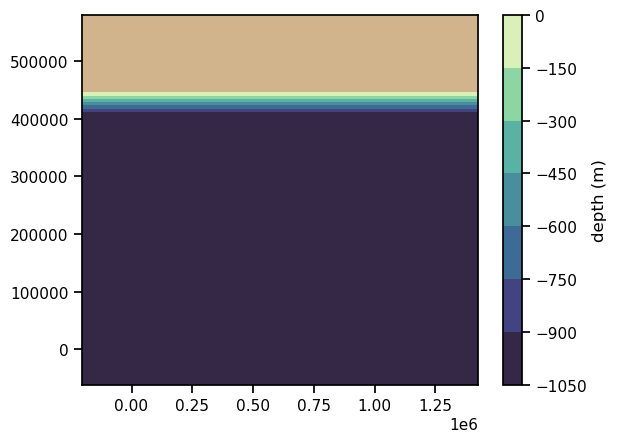

In [27]:
# Plot bathymetry
fig, ax = plt.subplots(1,1)
ax.set_facecolor('tan')
pc = ax.contourf(XC[0,:],YC[:,0],
                np.ma.masked_array(-depth, mask=mask),
                cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, label='depth (m)')


In [28]:
time

array([36000., 37200., 38400., 39600., 40800., 42000., 43200., 44400.,
       45600., 46800., 48000., 49200., 50400., 51600., 52800., 54000.,
       55200., 56400., 57600., 58800., 60000., 61200., 62400., 63600.,
       64800., 66000., 67200., 68400., 69600., 70800., 72000.])

In [29]:
W = nc_nobay.variables['W']
W.shape

(31, 40, 320, 272)

In [30]:
RC[25]

-222.39999999999995

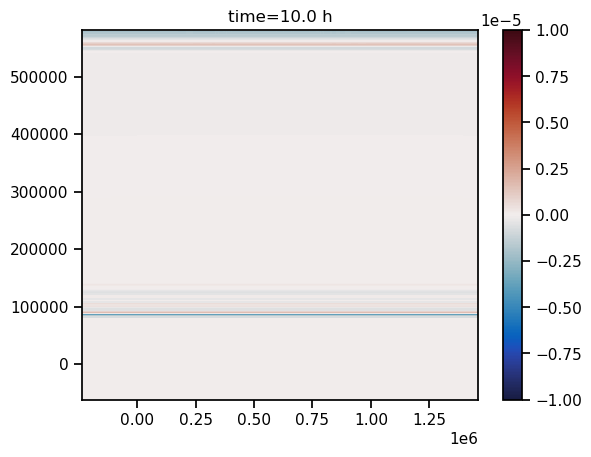

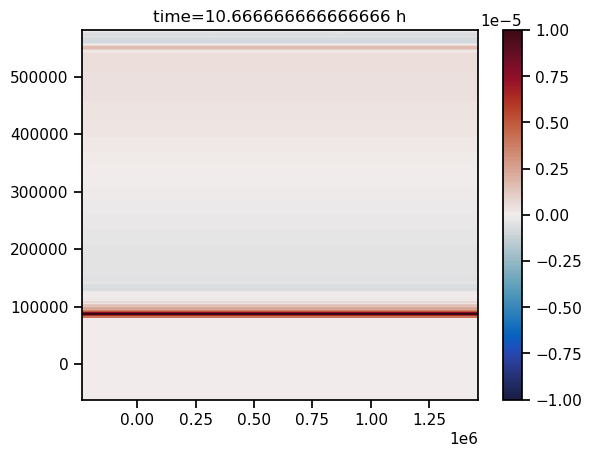

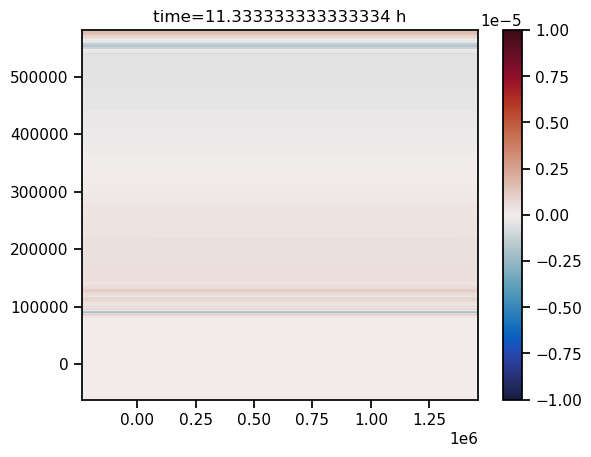

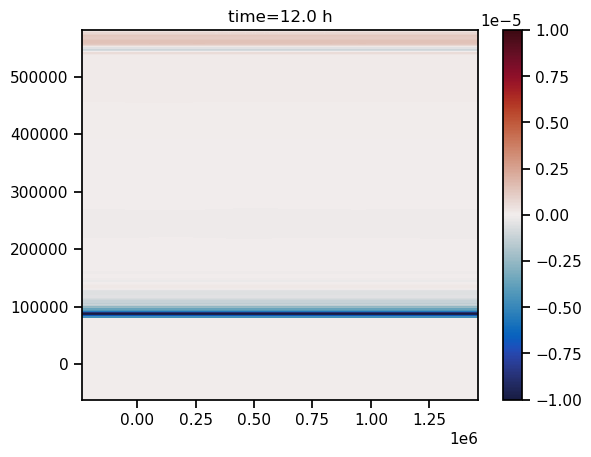

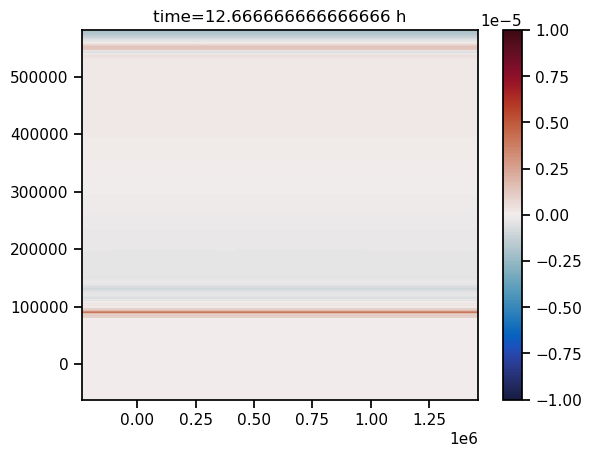

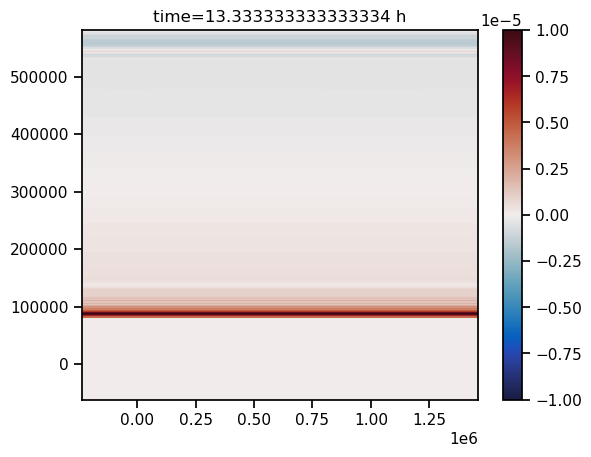

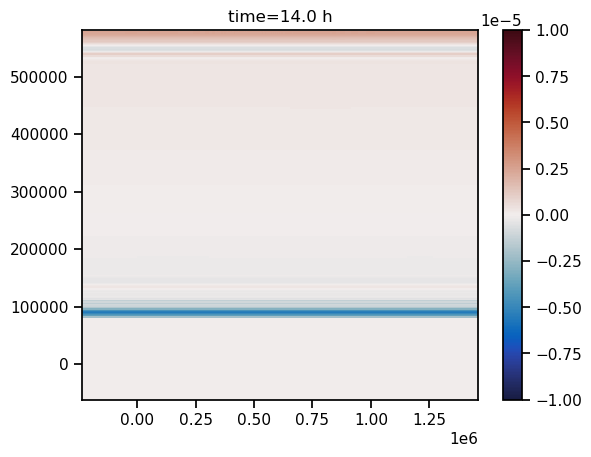

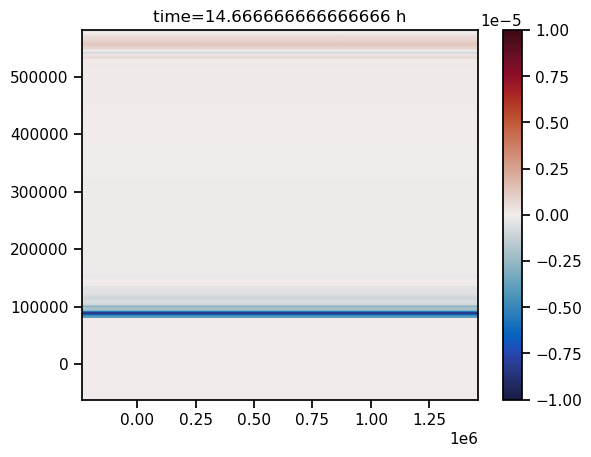

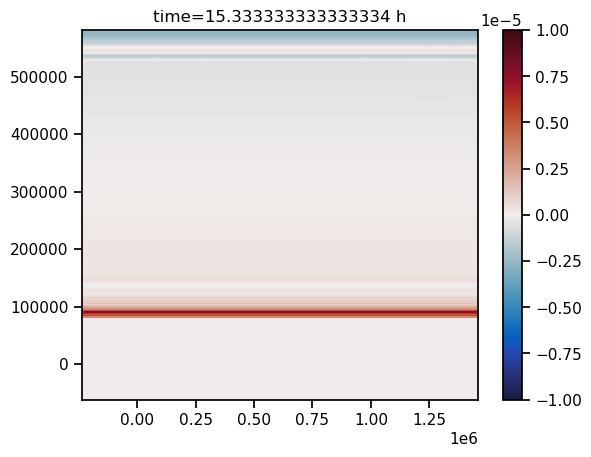

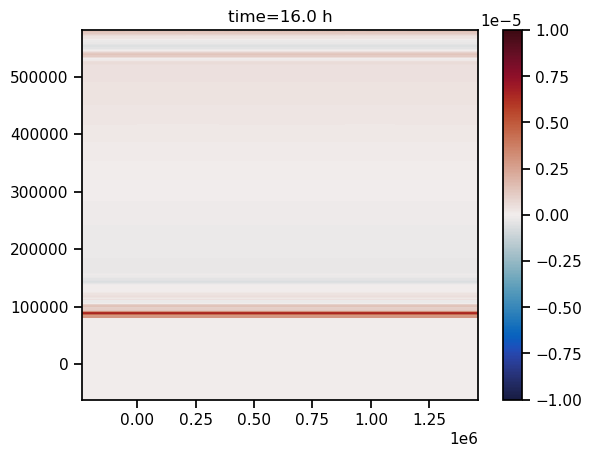

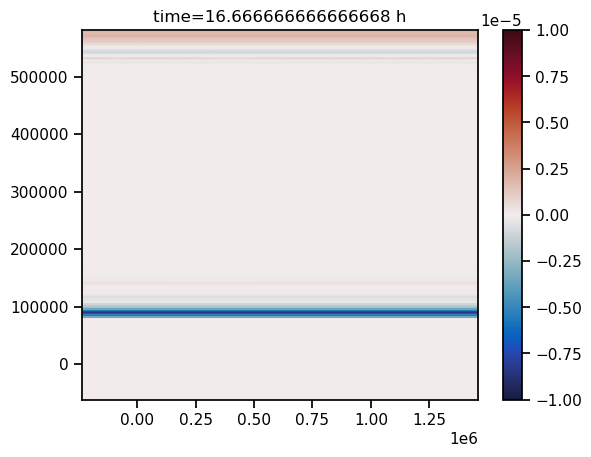

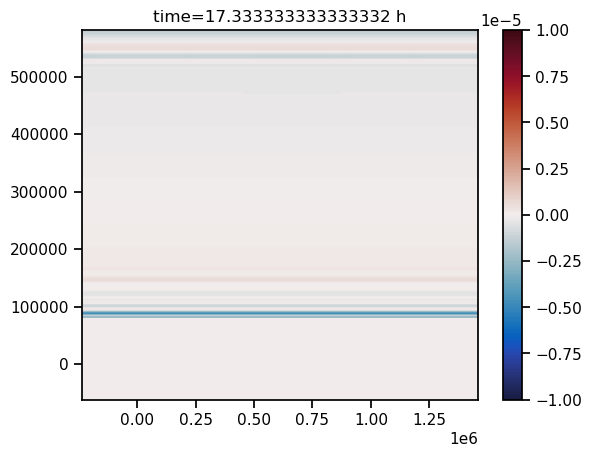

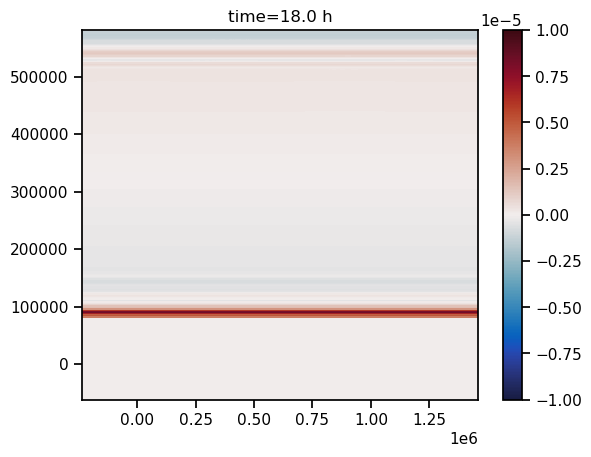

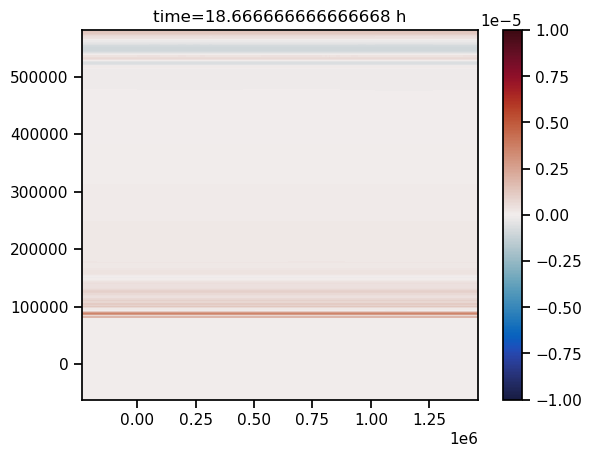

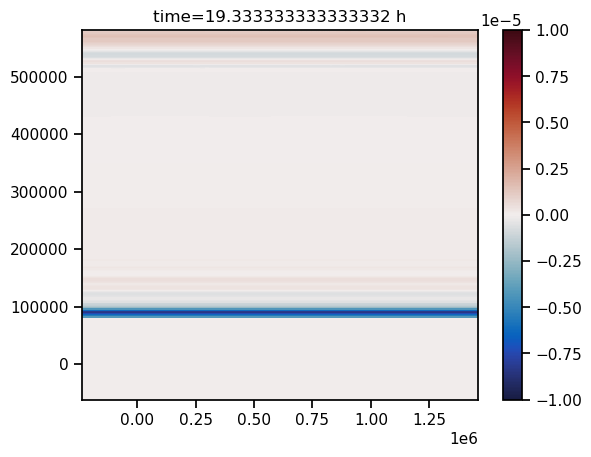

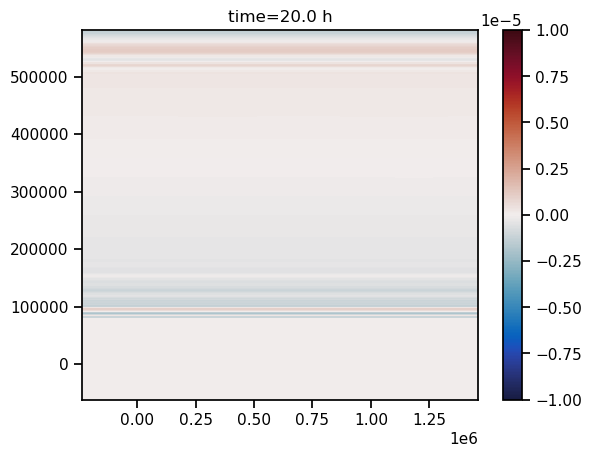

In [31]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
for tt in range(0,31,2):
    W = nc_nobay.variables['W'][tt,25,:,:]
    plt.pcolormesh(XC[0,:],np.flip(YC[:,0]),W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    plt.colorbar()
    plt.title(f'time={time[tt]/3600} h')
    plt.show()

In [32]:
np.shape(W)

(320, 272)

In [33]:
print(XC[0,100])
print(YC[120,0])

507704.6500000012
180133.2


In [34]:
XC.shape
print(XC[0,0])

-205000.0


In [16]:
2*36000

72000

In [17]:
nc_nobay.variables['T'][:]

array([36000., 37200., 38400., 39600., 40800., 42000., 43200., 44400.,
       45600., 46800., 48000., 49200., 50400., 51600., 52800., 54000.,
       55200., 56400., 57600., 58800., 60000., 61200., 62400., 63600.,
       64800., 66000., 67200., 68400., 69600., 70800., 72000.])

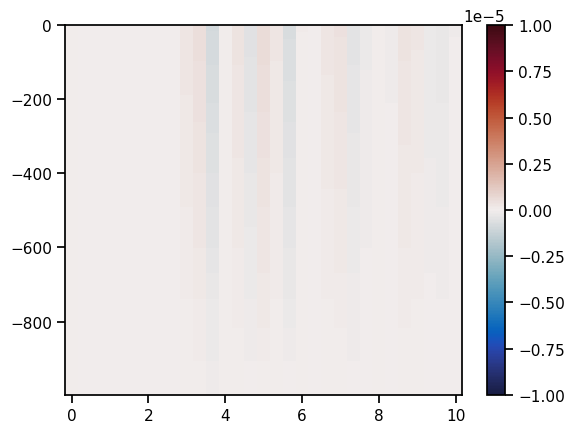

In [21]:
W = nc_nobay.variables['W'][:,:,100,120]
plt.pcolormesh(time/3600,RC,np.transpose(W),vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
plt.colorbar()
plt.title(f'')
plt.show()